# Employee Promotion Prediction

## IPBA Batch 11 || Group-G

## Importing Libraries

In [1]:
# Importing some required packages/libraries
import os
import numpy as np
import pandas as pd

#Importing Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Preprocessing and Modelling Library
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV,cross_validate,validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Pretty display for notebooks
%matplotlib inline

sns.set_style(style = "darkgrid")
plt.rcParams['figure.figsize'] = [5.0, 8.0] # make plot sizes, relatively larger than the normal notebook


## Data Loading

In [2]:
#To check the current working directory
os.getcwd()

'C:\\Users\\hp\\Desktop\\PYTHON\\BYOP Series of files GG'

In [3]:
# Change the current working directory
#os.chdir('File Address')

In [4]:
#Load the dataset
promo = pd.read_csv("C:/Users/hp/Desktop/PYTHON/BYOP GG HR Analytics Promotion prediction Raw Data File.csv") #, index_col = ["employee_id"])

## Data Exploration

In [5]:
#To see first 10 Rows
promo.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85.0,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59.0,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63.0,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83.0,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54.0,0


### Summary:

1. There are total 13 columns/features, out of which 5 are categorical.

In [6]:
#to check column name for spaces/correction
print(promo.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


### Summary :

1. Column names are acceptable, we can go ahead with the same names.

In [7]:
#Distribution analysis of numerical and categorical columns
promo.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808.0,NaN,NaN,NaN,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808.0,NaN,NaN,NaN,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,NaN,NaN,NaN,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,NaN,NaN,NaN,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,NaN,NaN,NaN,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0


### Summary: 

1.There are total 54809 rows and 13 columns.<br>
2.This data covers employees from 9 different department, where maximum employees belongs to Sales and Marketting Department i.e. nearly 1/3rd of total employees.<br>
      3.There are total 34 regions whereas around 1/4th are from region 2.<br>
      4.Nearly 2/3rd of the employees have only Bachelor's degree.<br>
      5.Nearly 2/3rd of the employees are male and rest are female.<br>
      6.More than 75% employee has only taken one training.<br>
      7.Age of the employees ranges from 20-60 years whereas around 75% employees are below 40 years.<br>
      8.The average rating of the employees is between 3-4.<br>
      9.Less than 3% of the employees has received award atleast once in their tenure.<br>
      10.The minimum score obtained in the training by any employee is 39 and avg score is 64.<br>
      11.Only 8.5% of the total employees got promoted.<br>
        

In [8]:
Uniq = promo.nunique()
print(Uniq)

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64


# Univariate Analysis

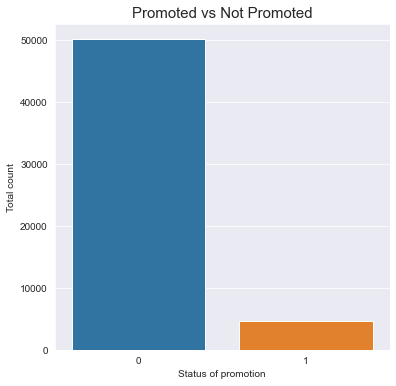

In [9]:
###Promoted vs Not Promoted

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 6 , 6 ))
  
# Plot the countplot
sns.countplot( ax = ax , x = "is_promoted" , data = promo )

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Status of promotion" , size = 10 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 10 )
  
# Set title for plot
ax.set_title( "Promoted vs Not Promoted" , size = 15 )
  
# Display figure
plt.show()

### Summary:
      1.Only 1/10th of the employees promoted. (1 is promoted and 0 is not promoted)
      2.There is class imbalace, only about 8% employees got the promotion.

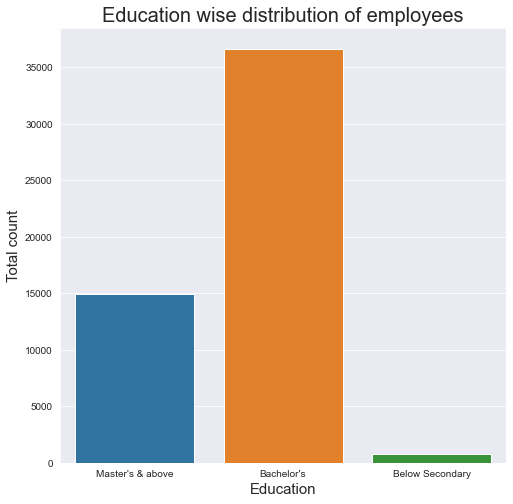

In [10]:
### Education wise distribution of employees

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 8 , 8 ))
  
# Plot the countplot
sns.countplot( ax = ax , x = "education" , data = promo )

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Education" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Education wise distribution of employees" , size = 20)
  
# Display figure
plt.show()

### Summary: 
    1. Around 70% employees have bachelors degree and 30% have master's degree.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


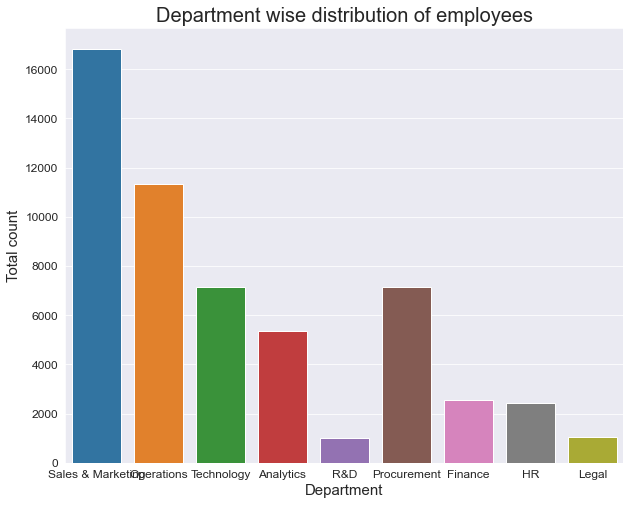

In [11]:
### Distribution of employees in various departments

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 10 , 8 ))
  
# Plot the histogram
sns.countplot('department',data = promo)

#Axis value size
plt.tick_params(labelsize=12)
  
# Set label for x-axis
ax.set_xlabel( "Department" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Department wise distribution of employees" , size = 20)

# Display figure
plt.show()


### Summary: 
    
    1. Maximum employees are from Sales & Marketting, Operations and Procurement.(More than 50%)  

Text(0.5, 1.0, 'Age wise distribution of employees')

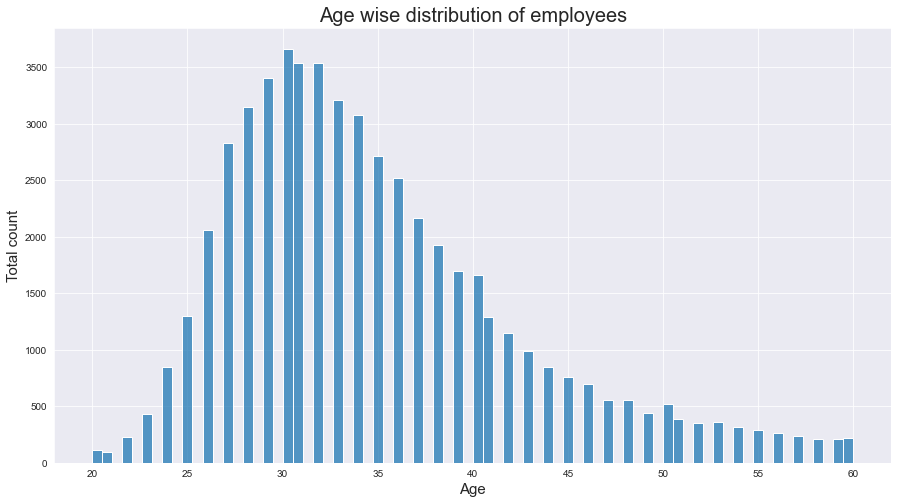

In [12]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
  
# Plot the histogram
sns.histplot( ax = ax , x = "age" , data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Age" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Age wise distribution of employees" , size = 20)


### Summary
1. Age of the employees is between 24 to 40 years.<br>
2. Age follows normal distribution curve, it is slightly skewed in right. 

Text(0.5, 1.0, 'Training score wise distribution of employees')

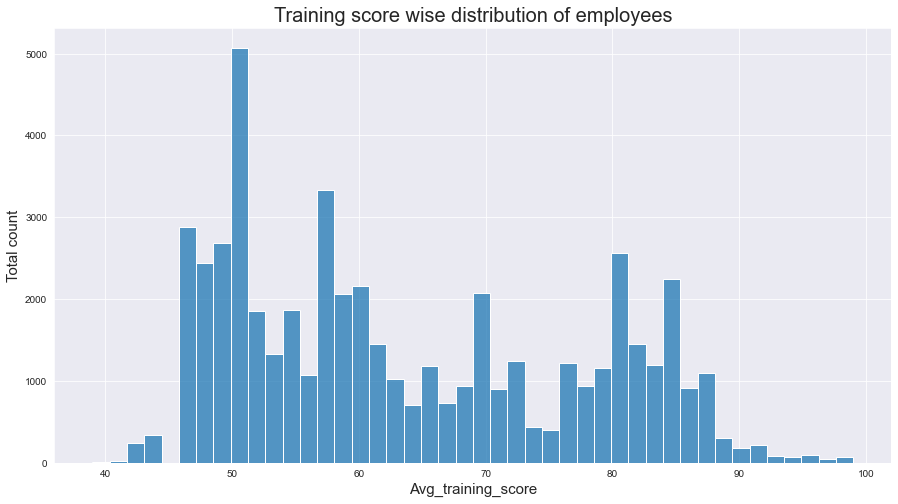

In [13]:
### Distribution of Average Training Score

# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 15 , 8 ))
  
# Plot the histogram
sns.histplot( ax = ax , x = "avg_training_score" , data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Avg_training_score" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Training score wise distribution of employees" , size = 20)

### Summary:
    
    1. Training score obtained does not follow normal distribution.<br>
    2. Most of the employees scored in the range of 45 and 55.

### Note:
    
The previous_year_rating describes the rating an employee recieved in the internal evaluations of the company in the previous year. These ratings give a clear differentiation between employees. By intuition, an employee with a good rating paired with other factors is likelier to be promoted. To prove this hypothesis, the previous_year_rating column is first encoded into labels for understanding.

New - rating 0, new employee
Minimum - raitng 1
Fair - rating 2
Improving - rating 3
Good - rating 4
Very good - rating 5
NOTE: These rating labels are chosen to be subtle about it.
    


In [14]:
def decode(val):
    if val == 0:
        return 'New'
    elif val == 1:
        return 'Minimum'
    elif val == 2:
        return 'Fair'
    elif val == 3:
        return 'Improving'
    elif val == 4:
        return 'Good'
    else:
        return 'Very good'
    
promo['rating_label'] = promo.previous_year_rating.apply(decode)
promo.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,Improving


In [15]:
ratings = promo.pivot_table(values='is_promoted',index='rating_label')
ratings

,is_promoted
rating_label,
Fair,0.042840
Good,0.079376
Improving,0.072779
Minimum,0.014141
Very good,0.142452


Text(0.5, 0, 'ratings')

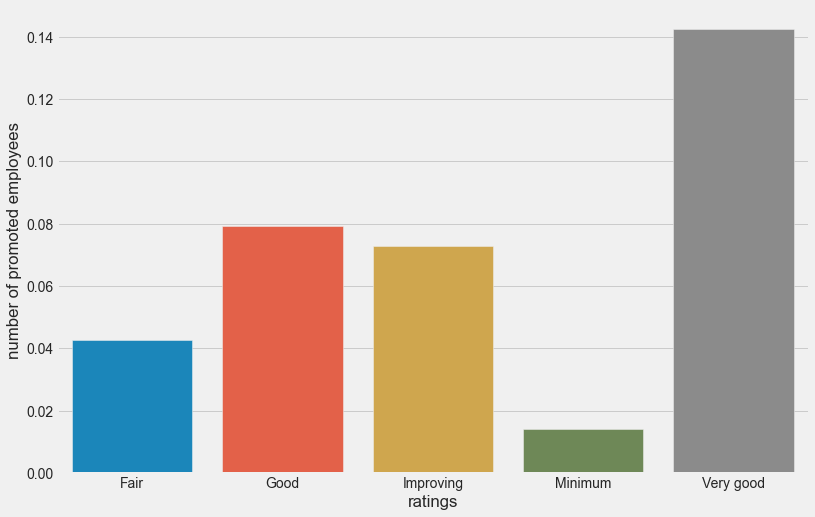

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
sns.barplot(
    x=ratings.index,
    y=ratings.is_promoted
)
plt.ylabel('number of promoted employees')
plt.xlabel('ratings')

### Summary

The plot proves the hypothesis coined earlier.

Employees with 'Very good' rating (5) are most likely to be promoted.
The trend in the number of people promoted is upwards from 'Minimum' to 'Very good' rating.
'New' (no previous year rating) employees shows good percentage of people being promoted. For these employees, other factors are dominant.
The last columns to analyze are the department and education. Intuitively the education of an employee is very important when recruiting, but once the employee has joined, the performance within the company is what should matter. Promotions happen within each departments, meaning a sales employee is promoted but stays in the sales department. This can be considered to generally true, with ofcourse a few exceptions. By these arguments, the two columns offer less inuition when analyzing which factors affect an employee's promotion.

# Bivariate Analysis

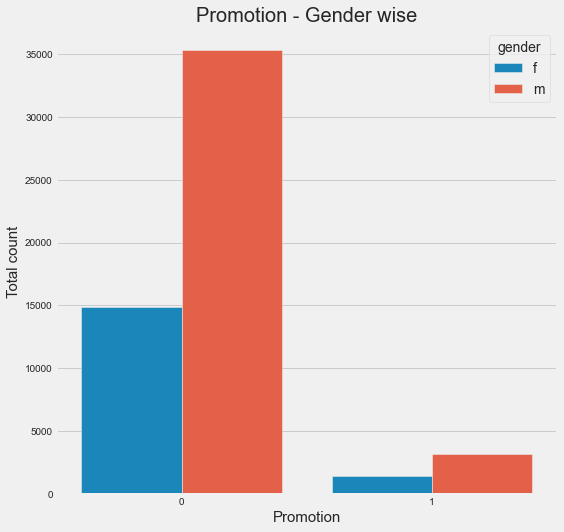

In [17]:
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = ( 8 , 8 ))
  
# Plot the scatterplot
sns.countplot(x = "is_promoted", hue = "gender", data = promo)

#Axis value size
plt.tick_params(labelsize=10)
  
# Set label for x-axis
ax.set_xlabel( "Promotion" , size = 15 )
  
# Set label for y-axis
ax.set_ylabel( "Total count" , size = 15 )
  
# Set title for plot
ax.set_title( "Promotion - Gender wise" , size = 20)
  
# Display figure
plt.show()



### Summary
1. It seems there is no such bias in giving promotion.

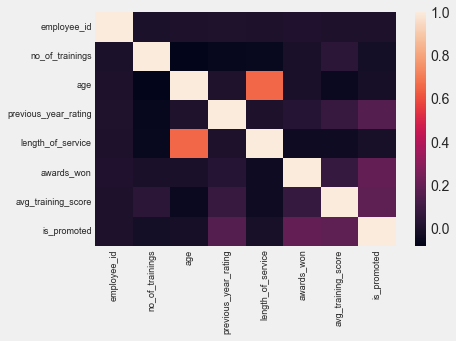

In [18]:
###Heat Map
#Set plot size
fig = plt.figure(figsize =(6, 4))
#Set axis parameter font size
plt.tick_params(axis='both', which='major', labelsize=9)

sns.heatmap(promo.select_dtypes(['float64' , 'int']).corr())
plt.show()


### Summary: 
    1. There is high correlation between age and Length of service, we can drop age column.
    2. We can also drop employee ID, department, region, gender and recruitment channel as it will not impact the model.

# Data Processing

## Detection and Treatment of Missing values

In [19]:
# Sum of null values in each column
promo.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
rating_label               0
dtype: int64

In [20]:
#Finding the mean of the column having NaN
mean_value=promo['avg_training_score'].mean()
  
print('Mean Value:',mean_value,)

# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['avg_training_score'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(promo)

Mean Value: 63.71223778900628
Updated Dataframe:
       employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel 

In [21]:
# Replace NaNs in column 'education' with dummy value 'NA' in the same column
promo['education'].fillna(value='NA', inplace=True)
print('Updated Dataframe:')
promo

Updated Dataframe:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.000000,0,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.000000,0,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.000000,0,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.000000,0,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.000000,0,Improving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.000000,0,Improving
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.000000,0,Fair
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.000000,0,Very good
54806,13614,Sales & Marketing,region_9,NA,m,sourcing,1,29,1.0,2,0,63.712238,0,Minimum


In [22]:
#Finding the mean of the column having NaN
mean_value1=promo['previous_year_rating'].mean()
 
print("Mean Value1:", mean_value1)

# Replace NaNs in column avg_training_score with the mean of values in the same column
promo['previous_year_rating'].fillna(value=mean_value1, inplace=True)
print('Updated Dataframe:')
promo.head()

Mean Value1: 3.329255780917055
Updated Dataframe:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,rating_label
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,Very good
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0,Very good
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0,Improving
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0,Minimum
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0,Improving


### Summary:
    1. Numerical missing values are replaced by mean and categorical feature column missing values as is very less in no. kept as 4th category NA.

# Detection and Treatment of Outliers

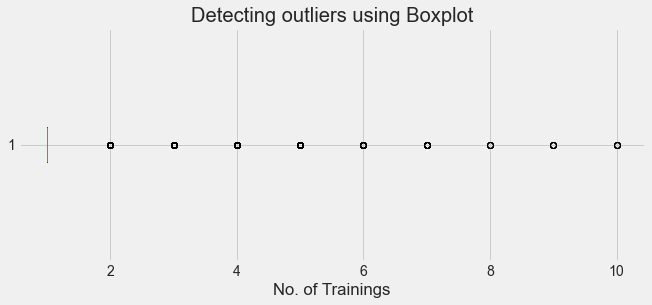

In [23]:
#Boxplots
fig = plt.figure(figsize =(10, 4))
plt.boxplot(promo["no_of_trainings"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('No. of Trainings')
plt.show()

In [24]:
#Detecting Outlier using IQR
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(promo["no_of_trainings"])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

## Feature Engineering

In [25]:
# creating a additional features
promo['rating_metric'] = promo['awards_won'] + promo['previous_year_rating']
promo['total_training_score'] = promo['avg_training_score'] * promo['no_of_trainings']


### Summary:
    1. Creating two additional feature of more importance from the existing features viz. rating_metric which is sum of award won and previous year rating whereas total training score which is multiplication of avg training score and no. of trainings.  

## Handling Outliers

In [26]:
# Drop employees with greater than 5 trainings
print(promo.shape)
index_trainingover5 = promo[ (promo['no_of_trainings']>5) ].index
promo.drop(index_trainingover5 , inplace=True)
print(promo.shape)

(54808, 16)
(54737, 16)


In [27]:
## Dropping columns:- employee_id, department, region, gender, recruitment_channel
promo.drop(['employee_id', 'age','region', 'recruitment_channel','rating_label'],axis=1,inplace=True)
# check if age is important
print(promo)

              department         education gender  no_of_trainings  \
0      Sales & Marketing  Master's & above      f                1   
1             Operations        Bachelor's      m                1   
2      Sales & Marketing        Bachelor's      m                1   
3      Sales & Marketing        Bachelor's      m                2   
4             Technology        Bachelor's      m                1   
...                  ...               ...    ...              ...   
54803         Technology        Bachelor's      m                1   
54804         Operations  Master's & above      f                1   
54805          Analytics        Bachelor's      m                1   
54806  Sales & Marketing                NA      m                1   
54807                 HR        Bachelor's      m                1   

       previous_year_rating  length_of_service  awards_won  \
0                       5.0                  8           0   
1                       5.0        

### Summary:
    1. As the no. of trainings has outliers, dropping all the values above 5 trainings.
    2. Age is correlated with length of service and seems less significant which can be dropped.
    3.employee ID, recruitmnet channel, region and rating label features are also least significant and can be dropped.


In [28]:
scaled_features = promo.copy()
col_names = ['no_of_trainings', 'previous_year_rating','length_of_service','awards_won','avg_training_score','total_training_score']
label_names = ['department','education','gender', ]
features = scaled_features[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.get_dummies(scaled_features, columns=label_names, drop_first=True)
scaled_features[col_names] = features

In [29]:
scaled_features

,no_of_trainings,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,rating_metric,total_training_score,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,education_NA,gender_m
0,-0.428136,1.378316,0.500385,-0.153996,-1.114311,0,5.0,-0.731205,0,0,0,0,0,0,1,0,0,1,0,0
1,-0.428136,1.378316,-0.437614,-0.153996,-0.281305,0,5.0,-0.469530,0,0,0,1,0,0,0,0,0,0,0,1
2,-0.428136,-0.272230,0.265885,-0.153996,-1.038583,0,3.0,-0.707417,0,0,0,0,0,0,1,0,0,0,0,1
3,1.313586,-1.922777,0.969385,-0.153996,-1.038583,0,1.0,0.482018,0,0,0,0,0,0,1,0,0,0,0,1
4,-0.428136,-0.272230,-0.906614,-0.153996,0.703156,0,3.0,-0.160277,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,-0.428136,-0.272230,2.610884,-0.153996,1.081795,0,3.0,-0.041333,0,0,0,0,0,0,0,1,0,0,0,1
54804,-0.428136,-1.097503,0.031385,-0.153996,-0.584216,0,2.0,-0.564685,0,0,0,1,0,0,0,0,0,1,0,0
54805,-0.428136,1.378316,-0.672114,-0.153996,1.157522,0,5.0,-0.017545,0,0,0,0,0,0,0,0,0,0,0,1
54806,-0.428136,-1.922777,-0.906614,-0.153996,-0.000186,0,1.0,-0.381221,0,0,0,0,0,0,1,0,0,0,1,1


### Summary:
    1. Applied one hot encoding for categorical values and feature scaling for numerical values.
    2. For feature scaling used standard scalar as it doen not get affected with outliers and Centering and scaling happen independently on each feature.

### Splitting the dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features.loc[:, scaled_features.columns != 'is_promoted'], scaled_features['is_promoted'], test_size=0.30, random_state=101)

## Modelling

### With Under Sampling

In [31]:
rnd_under_sampling = RandomUnderSampler(random_state=42)
X_res, y_res = rnd_under_sampling.fit_resample(X_train, y_train)

In [32]:
print("proportion of y after before under sampling= " + str(sum(y_train)/38315))
print("# of 1s before under sampling=  " + str(sum(y_train)))
print("# of 1s after under sampling=  " + str(sum(y_res)))
print("proportion of y after under sampling= " + str(sum(y_res)/6546))

proportion of y after before under sampling= 0.085423463395537
# of 1s before under sampling=  3273
# of 1s after under sampling=  3273
proportion of y after under sampling= 0.5


### Cross Validation

In [33]:
clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=101)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, scoring="roc_auc", cv=5 ))

[0.78079483 0.76763779 0.79422345 0.77443098 0.78991993]


In [34]:
clf = RandomForestClassifier(n_estimators=100, random_state=101)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, cv=5, scoring="roc_auc"))

[0.75738477 0.73174242 0.74606532 0.74206177 0.7618449 ]


In [35]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=101)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, cv=5, scoring="roc_auc"))

[0.79052736 0.7875248  0.80851017 0.78587903 0.81005556]


## Grid Search CV with Under Sampling

In [36]:

model_params = { 
    'random_forest': {
        'model': RandomForestClassifier(random_state=101),
        'params' : {
            'n_estimators': [50,100,200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', random_state=101),
        'params': {
            "penalty":["l1","l2"]
        }
    },
     'Gradient_boosting' : {
        'model': GradientBoostingClassifier(n_estimators=100, random_state=101),
        'params': {
           'n_estimators': [200,300]
        }
    },
}

In [37]:

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_res, y_res.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.676137,{'n_estimators': 100}
1,logistic_regression,0.702263,{'penalty': 'l1'}
2,Gradient_boosting,0.722580,{'n_estimators': 300}


### Summary: 

After performing a Grid search the optimal paramters for the model are returned. Using these parameters, the model is finally trained on the train set and tested as well as make predictions on the test set. This model becomes the final output from the analysis.

In [38]:
model = RandomForestClassifier(random_state=101, n_estimators=100)
model.fit(X_res, y_res)
preds = model.predict(X_test)

Accuracy = 0.70
Recall = 0.67



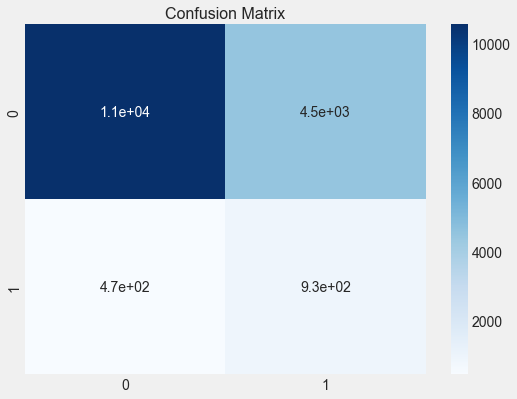

In [39]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [40]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     15029
           1       0.17      0.67      0.27      1393

    accuracy                           0.70     16422
   macro avg       0.56      0.68      0.54     16422
weighted avg       0.89      0.70      0.76     16422



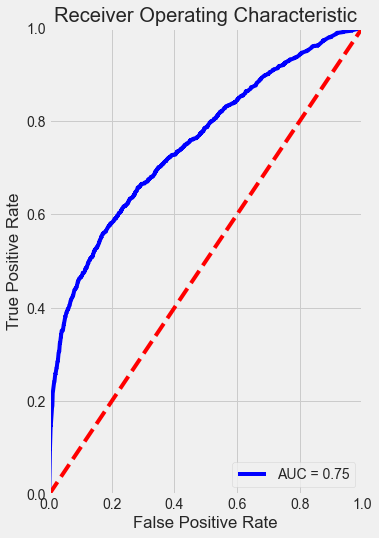

In [41]:

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
RF_fpr, RF_tpr, threshold = metrics.roc_curve(y_test, preds)
RF_roc_auc = metrics.auc(RF_fpr, RF_tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(RF_fpr, RF_tpr, 'b', label = 'AUC = %0.2f' % RF_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:

Logreg = LogisticRegression(penalty='l2',solver='liblinear', random_state=101)
Logreg.fit(X_res, y_res)


LogisticRegression(random_state=101, solver='liblinear')

In [43]:
y_pred = Logreg.predict(X_test)

Accuracy = 0.75
Recall = 0.67



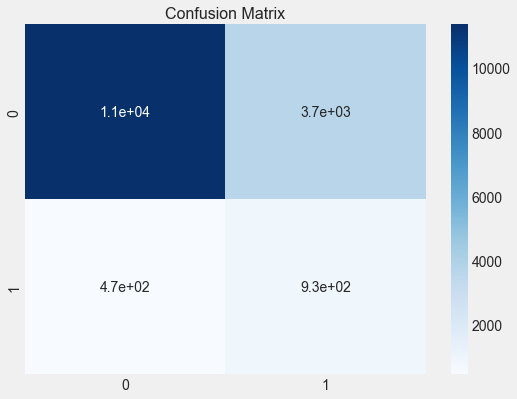

In [44]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [45]:

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     15029
           1       0.20      0.67      0.31      1393

    accuracy                           0.75     16422
   macro avg       0.58      0.71      0.58     16422
weighted avg       0.90      0.75      0.80     16422



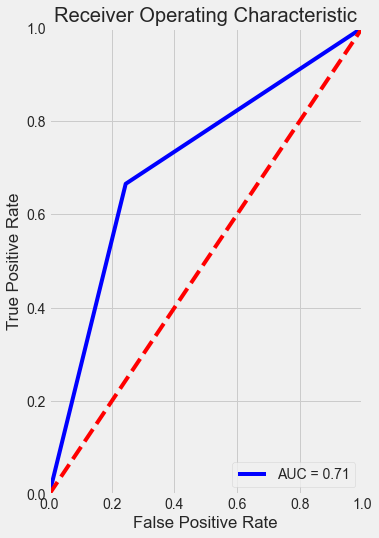

In [46]:

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
LR_fpr, LR_tpr, threshold = metrics.roc_curve(y_test, y_pred)
LR_roc_auc = metrics.auc(LR_fpr, LR_tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(LR_fpr, LR_tpr, 'b', label = 'AUC = %0.2f' % LR_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:

model = GradientBoostingClassifier(n_estimators=300, random_state=101)
model.fit(X_res, y_res)
Gpreds = model.predict(X_test)

Accuracy = 0.81
Recall = 0.61



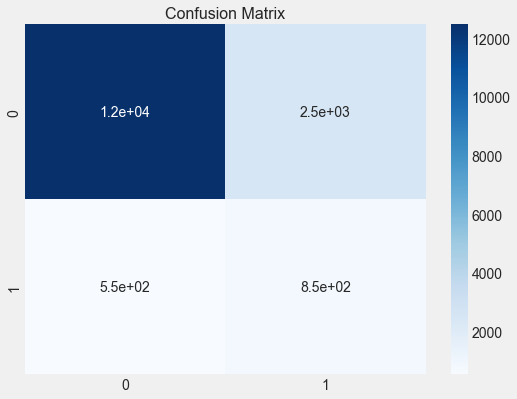

In [48]:
print(f'Accuracy = {accuracy_score(y_test, Gpreds):.2f}\nRecall = {recall_score(y_test, Gpreds):.2f}\n')
cm = confusion_matrix(y_test, Gpreds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [49]:

print (classification_report(y_test, Gpreds))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     15029
           1       0.25      0.61      0.35      1393

    accuracy                           0.81     16422
   macro avg       0.60      0.72      0.62     16422
weighted avg       0.90      0.81      0.84     16422



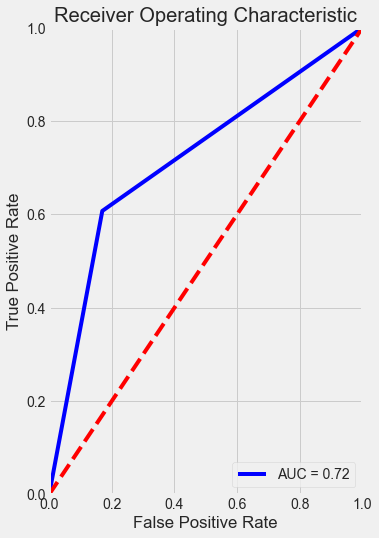

In [50]:

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
GB_fpr, GB_tpr, threshold = metrics.roc_curve(y_test, Gpreds)
GB_roc_auc = metrics.auc(GB_fpr, GB_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(GB_fpr, GB_tpr, 'b', label = 'AUC = %0.2f' % GB_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC comparison with Undersampling

C:\Users\hp\AppData\Local\Temp\ipykernel_11608\742370391.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(GB_fpr, GB_tpr, 'b', label = 'Gradient Boosting AUC = %0.2f' % GB_roc_auc, color='green')
C:\Users\hp\AppData\Local\Temp\ipykernel_11608\742370391.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(LR_fpr, LR_tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % LR_roc_auc, color='yellow')


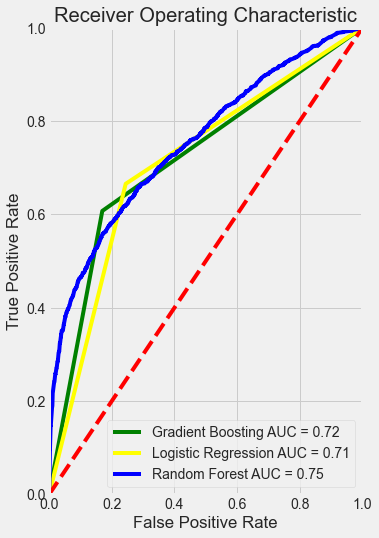

In [51]:
plt.title('Receiver Operating Characteristic')
plt.plot(GB_fpr, GB_tpr, 'b', label = 'Gradient Boosting AUC = %0.2f' % GB_roc_auc, color='green')
plt.plot(LR_fpr, LR_tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % LR_roc_auc, color='yellow')
plt.plot(RF_fpr, RF_tpr, 'b', label = 'Random Forest AUC = %0.2f' % RF_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Summary: 
The Gradient boosting model does extremely well due to the hyper-paramter tuning executed on the model. The model gives the best fit possible with a test set accuracy of 81%. Generating a classification_report to gain more insights into the model.
It has also an AUC of 0.72 highestamong other two model. Random forest has also done well but the precision and recall is very low.

### With oversampling

In [52]:

rnd_over_sampling = RandomOverSampler(random_state=42)
X_res, y_res = rnd_over_sampling.fit_resample(X_train, y_train)

In [53]:
print("proportion of y after before over sampling= " + str(sum(y_train)/38315))
print("# of 1s before over sampling=  " + str(sum(y_train)))
print("# of 1s after over sampling=  " + str(sum(y_res)))
print("proportion of y after over sampling= " + str(sum(y_res)/70084))

proportion of y after before over sampling= 0.085423463395537
# of 1s before over sampling=  3273
# of 1s after over sampling=  35042
proportion of y after over sampling= 0.5


In [54]:
clf = LogisticRegression(penalty='l1', solver='liblinear' )

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, cv=5))

[0.6994364  0.70179068 0.70022116 0.70207605 0.70526541]


In [55]:
clf = RandomForestClassifier(n_estimators=100, random_state=101)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, cv=5, scoring="roc_auc"))

[0.9694754  0.9690976  0.96853105 0.97073666 0.96936412]


In [56]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=101)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

print(cross_val_score(clf, X_res, y_res, cv=5, scoring="roc_auc"))

[0.80695684 0.80472216 0.81228907 0.80786951 0.81285352]


### Grid Search CV with Over Sampling

In [57]:
model_params = { 
    'random_forest': {
        'model': RandomForestClassifier(random_state=101),
        'params' : {
            'n_estimators': [100,200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear', random_state=101),
        'params': {
            "penalty":["l1","l2"]
        }
    },
     'Gradient_boosting' : {
        'model': GradientBoostingClassifier(random_state=101),
        'params': {
           'n_estimators': [200,300]
        }
    },
}

In [58]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_res, y_res.values.ravel())
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.912319,{'n_estimators': 100}
1,logistic_regression,0.701786,{'penalty': 'l1'}
2,Gradient_boosting,0.740326,{'n_estimators': 300}


### Summary: 

After performing a Grid search the optimal paramters for the model are returned. Using these parameters, the model is finally trained on the train set and tested as well as make predictions on the test set. This model becomes the final output from the analysis.

In [59]:
model = RandomForestClassifier(random_state=101, n_estimators=100)
model.fit(X_res, y_res)
preds = model.predict(X_test)

Accuracy = 0.83
Recall = 0.47



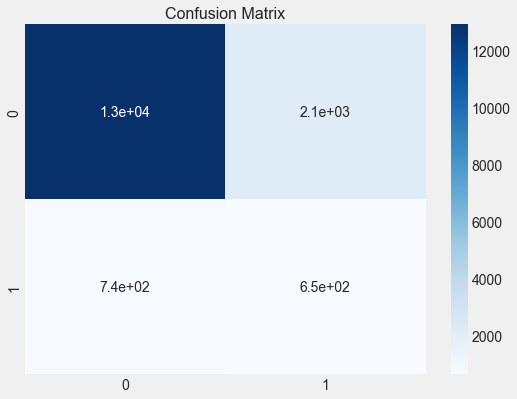

In [60]:
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [61]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     15029
           1       0.24      0.47      0.31      1393

    accuracy                           0.83     16422
   macro avg       0.59      0.66      0.61     16422
weighted avg       0.89      0.83      0.85     16422



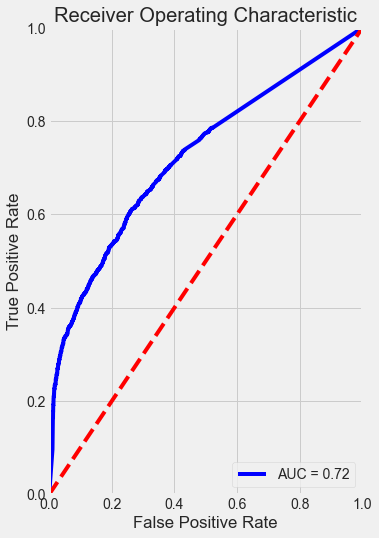

In [62]:

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
RF_fpr, RF_tpr, threshold = metrics.roc_curve(y_test, preds)
RF_roc_auc = metrics.auc(RF_fpr, RF_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(RF_fpr, RF_tpr, 'b', label = 'AUC = %0.2f' % RF_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
Logreg = LogisticRegression(penalty='l2',solver='liblinear', random_state=101)
Logreg.fit(X_res, y_res)


LogisticRegression(random_state=101, solver='liblinear')

In [64]:
y_pred = Logreg.predict(X_test)

Accuracy = 0.75
Recall = 0.66



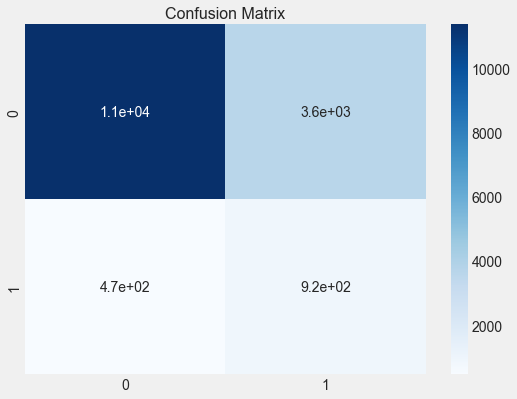

In [65]:
print(f'Accuracy = {accuracy_score(y_test, y_pred):.2f}\nRecall = {recall_score(y_test, y_pred):.2f}\n')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [66]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     15029
           1       0.20      0.66      0.31      1393

    accuracy                           0.75     16422
   macro avg       0.58      0.71      0.58     16422
weighted avg       0.90      0.75      0.80     16422



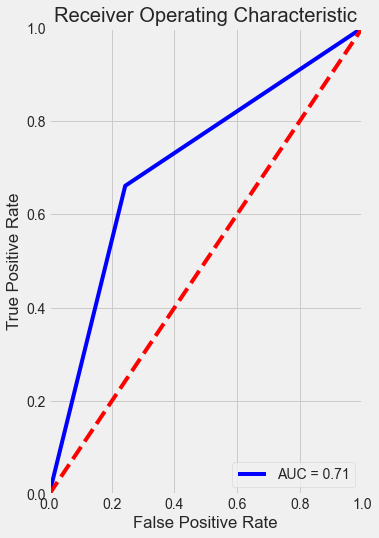

In [67]:

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
LR_fpr, LR_tpr, threshold = metrics.roc_curve(y_test, y_pred)
LR_roc_auc = metrics.auc(LR_fpr, LR_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(LR_fpr, LR_tpr, 'b', label = 'AUC = %0.2f' % LR_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
model = GradientBoostingClassifier(n_estimators=300, random_state=101)
model.fit(X_res, y_res)
Gpreds = model.predict(X_test)

Accuracy = 0.84
Recall = 0.59



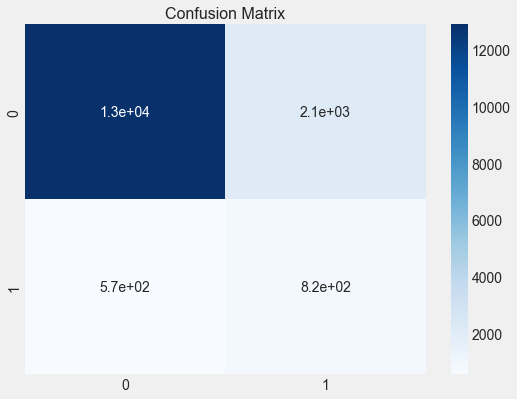

In [69]:
print(f'Accuracy = {accuracy_score(y_test, Gpreds):.2f}\nRecall = {recall_score(y_test, Gpreds):.2f}\n')
cm = confusion_matrix(y_test, Gpreds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [70]:
print (classification_report(y_test, Gpreds))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     15029
           1       0.28      0.59      0.38      1393

    accuracy                           0.84     16422
   macro avg       0.62      0.73      0.64     16422
weighted avg       0.90      0.84      0.86     16422



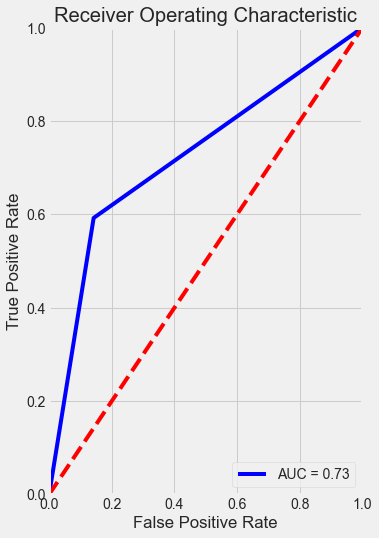

In [71]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
GB_fpr, GB_tpr, threshold = metrics.roc_curve(y_test, Gpreds)
GB_roc_auc = metrics.auc(GB_fpr, GB_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(GB_fpr, GB_tpr, 'b', label = 'AUC = %0.2f' % GB_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AUC comparison with oversampling

C:\Users\hp\AppData\Local\Temp\ipykernel_11608\742370391.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(GB_fpr, GB_tpr, 'b', label = 'Gradient Boosting AUC = %0.2f' % GB_roc_auc, color='green')
C:\Users\hp\AppData\Local\Temp\ipykernel_11608\742370391.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(LR_fpr, LR_tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % LR_roc_auc, color='yellow')


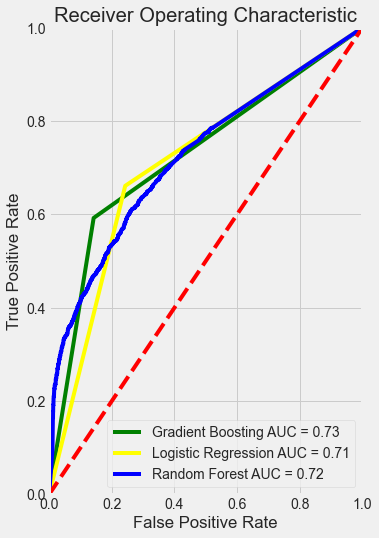

In [72]:
plt.title('Receiver Operating Characteristic')
plt.plot(GB_fpr, GB_tpr, 'b', label = 'Gradient Boosting AUC = %0.2f' % GB_roc_auc, color='green')
plt.plot(LR_fpr, LR_tpr, 'b', label = 'Logistic Regression AUC = %0.2f' % LR_roc_auc, color='yellow')
plt.plot(RF_fpr, RF_tpr, 'b', label = 'Random Forest AUC = %0.2f' % RF_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Summary: 
The Gradient boosting model does extremely well due to the hyper-paramter tuning executed on the model. The model gives the best fit possible with a test set accuracy of 84%. Generating a classification_report to gain more insights into the model.
It has also an AUC of 0.73 highestamong other two model.